<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
<table> <tr>

<table width="100%"><td style="background-color:#ffffff;font-size:14px;font-style:italic;text-align:right;">Prepared by <a href="http://cqtech.org" target="_blank">CQTech</a>.</td></table>
    
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# <font color="blue"> Solutions for </font> Two Qubit Topological Quantum Gates

<hr>

<a id="task1"></a>
##### Task 1

Draw this weaving sequence.

In [5]:
# identity braiding sequence
id_seq = [[2, 3], [1, -2], [2, -4], [1, 2], [2, 4], [1, 2], [2, -2], [1, -2], [2, -4],
          [1, -4], [2, -2], [1, 4], [2, 2], [1, -2], [2, 2], [1, 2], [2, -2], [1, 3]]

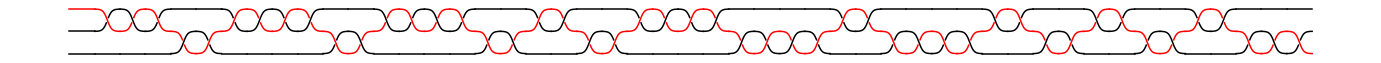

In [6]:
from tqsim import AnyonicCircuit

# ---- SOLUTION ---- #

id_circuit = AnyonicCircuit()
id_circuit.braid_sequence(id_seq)
id_circuit.drawer.anyons[3].color = "red"  # To highlight the 3rd anyon

id_circuit.draw()

<hr>

<a id="task2"></a>
##### Task 2

Verify that the given weaving sequence approximates the identity matrix.<br>
Use the *to_unitary* function, and the identity matrix given in the cell bellow.

In [8]:
# identity braiding sequence
id_seq = [[2, 3], [1, -2], [2, -4], [1, 2], [2, 4], [1, 2], [2, -2], [1, -2], [2, -4],
          [1, -4], [2, -2], [1, 4], [2, 2], [1, -2], [2, 2], [1, 2], [2, -2], [1, 3]]

In [9]:
import numpy as np

# sigma_1
sigma_1 = np.array([[np.exp(-4 * 1j * np.pi / 5), 0],
                    [0, np.exp(3 * 1j * np.pi / 5)]])
# sigma_1 ^ -1
sigma_1_inv = sigma_1.T.conjugate()

# sigma_2
PHI = (1 + np.sqrt(5)) / 2
F = np.array([[1 / PHI, 1 / np.sqrt(PHI)],
              [1 / np.sqrt(PHI), -1 / PHI]])
R = sigma_1
sigma_2 = F @ R @ F

# sigma_2 ^ -1
sigma_2_inv = sigma_2.T.conjugate()

# Identity
I = np.array([[1, 0],
              [0, 1]])

In [10]:
def distance(w, u):
    """
    This function calculates the spectral distance between two unitaries w and u 
    up to a global phase.
    """
    global_phase_w = pow(np.cfloat(np.linalg.det(w)), 1/w.shape[0])
    global_phase_u = pow(np.cfloat(np.linalg.det(u)), 1/u.shape[0])

    diff = np.matrix(w / global_phase_w - u / global_phase_u)

    return abs((max(np.linalg.eig(diff.getH() @ diff)[0]))**(1/2))


In [11]:
def to_unitary(braiding_sequence, target):
    """
    This function claculates the unitary matrix representation of the braiding_sequence 
    and measures its distance to the target unitary.
    """
    I = np.array([[1, 0],
                  [0, 1]])

    sigma = {1 : {1 : sigma_1, -1 : sigma_1_inv},
             2 : {1 : sigma_2, -1 : sigma_2_inv}}

    L = 0
    unitary = I
    for weave in braiding_sequence:
        for ii in range(abs(weave[1])):
            L += 1
            if weave[1] > 0:
                unitary = sigma[weave[0]][1] @ unitary
            else:
                unitary = sigma[weave[0]][-1] @ unitary

    print(f'Length = {L}\n')
    print(f'Target = \n\n{target}')
    print(f'\nBraiding Sequence Unitary = \n\n{unitary}')
    print(f'\nd(Target, Braiding Sequence) = {distance(unitary, target)}')

In [12]:
# ---- SOLUTION ---- #

to_unitary(id_seq, I)

Length = 48

Target = 

[[1 0]
 [0 1]]

Braiding Sequence Unitary = 

[[ 0.99999886-0.00073962j -0.00115795+0.00062367j]
 [ 0.00115795+0.00062367j  0.99999886+0.00073962j]]

d(Target, Braiding Sequence) = 0.0015089222294907274


<hr>

<a id="task3"></a>
#### Task 3

Compute the unitary representation of the braiding sequence of $CNOT$, using the braiding operators that we have generated above.

In [1]:
import numpy as np

cnot_seq = [[3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1]]

In [2]:
# Braiding operations of 6 anyons
from tqsim import generate_braiding_operator

braiding_ops = []
for ii in range(5):
    braiding_op = generate_braiding_operator(index=ii+1, nb_qudits=2, nb_anyons_per_qudit=3)
    braiding_ops.append(np.array(braiding_op))

In [3]:
# ---- SOLUTION ---- #

# Compute the unitary
unitary = np.eye(13) * (1 + 0j)
for braid_ in cnot_seq:
    if braid_[1] > 0:
        unitary = braiding_ops[braid_[0]-1] @ unitary
    else:
        unitary = braiding_ops[braid_[0]-1].T.conjugate() @ unitary


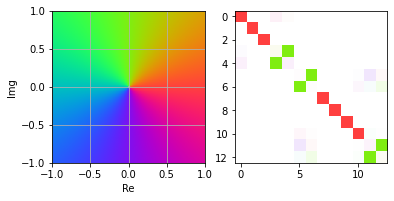

In [4]:
# plot the matrix
from tqsim import cplot
cplot(unitary, sigma=0.00003)

<hr>

<a  id="task4"></a>
#### Task 4

Compute the $CNOT$ unitary in the computational basis.

In [1]:
import numpy as np

computational_basis = [1, 2, 3, 4]

unitary = np.array([[ 9.99998803e-01+8.30404577e-07j, -7.45464829e-16-1.33935703e-15j,
         2.12042640e-16-4.22180403e-16j,  1.16917991e-03-6.96709188e-04j,
         7.35208389e-04+4.47061346e-05j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-4.88680092e-16+7.70680922e-16j,  1.00000000e+00-4.13949235e-16j,
         4.56650543e-16+1.05031460e-16j, -3.96857259e-16+2.97993586e-16j,
        -7.62355088e-16+5.79266932e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 2.79064921e-16+1.41256014e-16j,  5.58857094e-17-1.64269515e-16j,
         1.00000000e+00+5.24556552e-17j,  6.14552824e-17-2.32892217e-16j,
        -1.84084891e-15-3.55878124e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-4.37827661e-05-7.37190764e-04j, -4.71497836e-17+5.39389247e-16j,
         8.78846668e-16+2.19872888e-15j,  6.36136243e-04+1.27641068e-03j,
        -1.05711093e-03+9.99998152e-01j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 6.95061318e-04-1.16894738e-03j, -8.57767431e-16-4.84556229e-16j,
        -2.36362985e-16-1.12520189e-16j,  1.05794084e-03+9.99997497e-01j,
         6.36699218e-04-1.27724109e-03j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  6.36015067e-04-1.55199530e-04j,
        -2.67773774e-04+9.99997419e-01j,  8.90662477e-16+1.79253026e-15j,
        -1.01014393e-16+3.90272408e-16j,  6.27180713e-16+1.36095257e-15j,
        -3.44198819e-05-5.79543535e-04j, -1.54137560e-07-1.82103632e-03j,
         1.00405237e-03-9.31700117e-07j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  2.68286683e-04+9.99997015e-01j,
         6.36363005e-04+1.54686312e-04j,  8.65157159e-17-4.14116704e-16j,
         1.38664698e-16-7.51522291e-16j,  4.85055483e-17-5.51482381e-16j,
         5.46423413e-04-9.18969594e-04j, -1.00445560e-03-6.13753666e-07j,
        -4.27669651e-07+1.82143979e-03j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  4.81601606e-16+7.41860386e-16j,
        -1.31433422e-15-9.20995323e-17j,  1.00000000e+00+1.26105579e-16j,
         1.03481833e-15-2.31580314e-16j,  3.04157376e-15+1.08032497e-16j,
         5.87497249e-16-1.27381110e-16j,  9.86948741e-17+6.73760569e-16j,
        -1.31969088e-15+4.06792655e-16j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -3.40829975e-17+8.01510561e-16j,
         1.92396975e-16+3.59213666e-16j,  3.18834622e-16+2.66736021e-16j,
         1.00000000e+00-1.53752589e-16j, -8.51943592e-16-8.85383732e-17j,
        -1.15925761e-15+1.07522184e-16j,  4.73009414e-16+3.88832322e-16j,
         1.11022302e-16-5.55111512e-17j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -5.59601154e-17+4.80759377e-16j,
        -5.47078999e-16-6.76833752e-16j,  2.58939058e-15-2.65123830e-16j,
        -8.57143274e-16+6.18981236e-17j,  1.00000000e+00+3.14197781e-16j,
         5.60656119e-16-2.53177810e-16j, -1.19413835e-15-6.02675277e-17j,
         1.00966327e-15+7.34357236e-16j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  9.19152397e-04-5.47718888e-04j,
         5.77985088e-04+3.51457893e-05j, -1.58411404e-16+1.16515334e-16j,
        -1.93973134e-16-4.84786910e-16j,  2.58647797e-16+9.56226231e-17j,
         9.99998803e-01+8.30404577e-07j, -7.22592924e-04+4.30589959e-04j,
        -4.54383773e-04-2.76299107e-05j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -1.54137560e-07-1.82103632e-03j,
         1.00405237e-03-9.31700116e-07j, -2.00863950e-16+1.47046462e-15j,
         3.19590602e-16-7.52697909e-16j, -4.87789863e-16-6.37697834e-17j,
         2.70592376e-05+4.55608948e-04j,  6.35940177e-04-1.03998330e-03j,
         2.20063418e-04+9.99996966e-01j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -1.00445560e-03-6.13753667e-07j,
        -4.27669652e-07+1.82143979e-03j, -1.66533454e-16+0.00000000e+00j,
         1.44370657e-16-1.45297957e-15j,  5.41233725e-16-1.11022302e-16j,
        -4.29571519e-04+7.22449213e-04j, -2.19746422e-04+9.99996717e-01j,
         6.36155214e-04+1.03966611e-03j]])

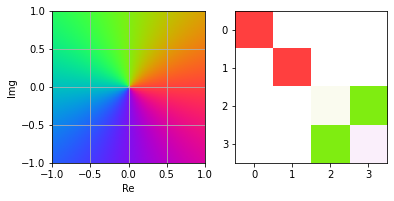

In [2]:
from tqsim import cplot

u = np.eye(4) * (1 + 0j)
for aa, ii in enumerate(computational_basis):
    for bb, jj in enumerate(computational_basis):
        u[aa][bb] = unitary[ii][jj]

cplot(u, sigma=0.00003)

<hr>

<a id="task5"></a>
#### Task 5

Compute the distance between this obtained $CNOT$ and the exact $CNOT$ whose target gate is the $iX$ gate.

In [1]:
import numpy as np
from tqsim import cplot

u = np.array([[ 1.00000000e+00-4.13949235e-16j,  4.56650543e-16+1.05031460e-16j,
        -3.96857259e-16+2.97993586e-16j, -7.62355088e-16+5.79266932e-16j],
       [ 5.58857094e-17-1.64269515e-16j,  1.00000000e+00+5.24556552e-17j,
         6.14552824e-17-2.32892217e-16j, -1.84084891e-15-3.55878124e-16j],
       [-4.71497836e-17+5.39389247e-16j,  8.78846668e-16+2.19872888e-15j,
         6.36136243e-04+1.27641068e-03j, -1.05711093e-03+9.99998152e-01j],
       [-8.57767431e-16-4.84556229e-16j, -2.36362985e-16-1.12520189e-16j,
         1.05794084e-03+9.99997497e-01j,  6.36699218e-04-1.27724109e-03j]])

In [2]:
def distance(w, u):
    """
    This function calculates the spectral distance between two unitaries w and u 
    up to a global phase.
    """
    global_phase_w = pow(np.cfloat(np.linalg.det(w)), 1/w.shape[0])
    global_phase_u = pow(np.cfloat(np.linalg.det(u)), 1/u.shape[0])

    diff = np.matrix(w / global_phase_w - u / global_phase_u)

    return abs((max(np.linalg.eig(diff.getH() @ diff)[0]))**(1/2))


In [3]:
# ---- SOLUTION ---- #

exact_cnot = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 0, 1j],
                       [0, 0, 1j, 0]])

print('d(exact_cnot, braided_cnot) =', distance(u, exact_cnot))

d(exact_cnot, braided_cnot) = 0.0017764778867267752
